# Вопрос 1
В отличии от одномерного пространства с 2 направлениями, двухмерное пространство имеет континуум направлений, таким образом прямой перебор с ограниченной точностью потребует большого количества вычислений. 

# Вопрос 2
Метод находит оптимум без использования производных, путем деформирования симплекса. Хорошо работает с простыми задачами оптимизации.
Не требует гладкости исследуемой функции. Так же отсутствует сходимость. 
Используется там, где не требуется высокая точность.


# Вопрос 3
Методы, использующие производные, имеют повышенную точность вместе с пониженной производительностью по сравнению с симплекс методами.

# Задача 1
Для расчета глобального минимума воспользуемся методом Монте-Карло


Рассмотрим функцию \\(f(x) = cos(30x) + sin(10x) + 0.3x^2\\)  
Т.к.
$$ 
\begin{aligned}
\lim_{x \to +\infty} f(x) = \infty, 
\lim_{x \to -\infty} f(x) = \infty
\end{aligned}
$$
и возрастающим членом функции является 
$0.3x^2$ можно утверждать, 
что глобальный минимум находится в окрестности нуля, 
поэтому ограничиваем поиск глобального минимума этой окрестностью.

Global minimum, x: -0.09590727514418385, y: -2.182942230003924


/tmp/ipykernel_9695/333749186.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noise_f[i] = func(x[i])
/tmp/ipykernel_9695/333749186.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  function[i] = func(points[i])


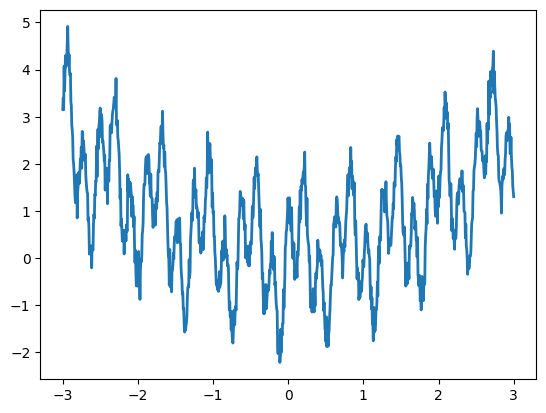

In [13]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
n = 1000
x = np.linspace(-3, 3, n)
np.random.seed(2)

f = np.cos(30 * x) + np.sin(10 * x) + 0.3 * (x ** 2)

def func(x):
    rnd = np.random.normal(0, 0.2, 1)
    return np.cos(30 * x) + np.sin(10 * x) + 0.3 * (x ** 2) + rnd


noise_f = np.zeros(x.shape)

for i in range(noise_f.shape[0]):
    noise_f[i] = func(x[i])

# Monte-Carlo Method

k = 10000
points = np.random.uniform(-3, 3, k)

function = np.zeros(k)
for i in range(k):
    function[i] = func(points[i])


sort_function = np.sort(function)
min_index = points[np.argmin(function)]
print(f'Global minimum, x: {min_index}, y: {sort_function[0]}')
fig, axis = plt.subplots()

axis.plot(x, noise_f, linewidth=2.0)

plt.show()

Ответы:
1. Ответ завист от количества "выстрелов". Есть случаи когда попадает в локальный минимум(0.5, -2) рядом с глобальным (-0.1, -2.2)
2. Алгоритм имеет такую же сложность как и метод грубого перебора.
3. В качестве параметра используется количество "выстрелов". От чего зависит плотность заполнения функции точками.

# Задача 2
Сравним методы Nelder-Mead, Newton-CG для функции Beale: \\(f(x,y) = (1.5-x+xy)^2 + (2.25 - x +xy^2)^2 + (2.625 - x +xy^3)^2\\) \
где \\(f(0)=(3, 0.5)\\)



In [3]:
import numpy as np
from scipy.optimize import minimize


def beale(x):
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*pow(x[1], 3))**2

def jacobian(x0):
    der = np.zeros(2)
    der[0] = 2*(1.5-x0[0]+x0[0]*x0[1])*(x0[1]-1)+2*(2.25-x0[0]+x0[0]*x0[1]**2)*(x0[1]**2-1) +2*(2.625-x0[0]+x0[0]*pow(x0[1], 3))*(pow(x0[1], 3)-1)
    der[1] = 2*(1.5-x0[0]+x0[0]*x0[1])*x0[0] +   2*(2.25-x0[0]+x0[0]*x0[1]**2)*2*x0[0]*x0[1]+2*(2.625-x0[0]+x0[0]*pow(x0[1], 3))*3*x0[0]*x0[1]**2
    return der

x0 = [3.5, 1]
nelder_mead = minimize(beale, x0,  method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
newton = minimize(beale, x0,  method='Newton-CG', jac=jacobian, options={'disp': True})

print(nelder_mead.x)
print(newton.x)

x0 = [4, 1]
x1 = [0, 0]
nelder_mit = minimize(beale, x0,  method='nelder-mead', options={'xatol': 1e-4, 'disp': True})
powell = minimize(beale, x0,  method='Powell', options={'disp': True})
newton = minimize(beale, x0,  method='Newton-CG', jac=jacobian, options={'disp': True})
print(nelder_mit.x)
print(newton.x)
print(powell.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 80
         Function evaluations: 150
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 59
         Hessian evaluations: 0
[3.  0.5]
[3.00000002 0.5       ]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 93
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 62
         Function evaluations: 67
         Gradient evaluations: 191
         Hessian evaluations: 0
[3.00002705 0.50000793]
[2.99999995 0.49999999]


На простой функции как Beale симплекс метод хуже и в точности и в производительности методов, использующих градиенты.

# Задача 3

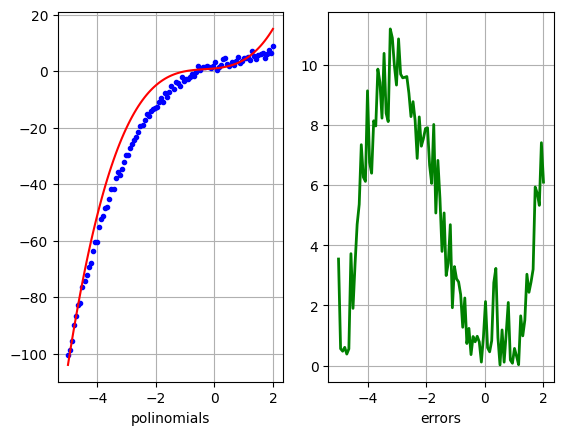

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize
%matplotlib inline

n = 100
x = np.linspace(-5, 2, n)

params = np.ones(4)

y = np.array([0.5*i**3-1*i**2+3*i+2+ np.random.normal(0, 1, 1) for i in x])

def D(theta, x):
    return theta[0]*x**3+theta[1]*x**2+theta[2]*x+theta[3]

def f(theta):
    return np.sum((y - D(theta, x))**2)

res = minimize(f, params, method='Nelder-Mead', options={'xatol': 1e-8, 'disp': False})

def fit(x, theta):
    return params[0]*x**3+params[1]*x**2+params[2]*x+params[3]
    
fit = np.array([fit(i, params) for i in x])
fit = fit[:, np.newaxis]
err = np.abs(np.subtract(fit, y))

fig, axis = plt.subplots(1, 2)
axis[0].plot(x, y, 'b.', x, fit, 'r')
axis[0].set_xlabel('polinomials')
axis[0].grid(True)
axis[1].plot(x, err, 'g', linewidth=2.0, )
axis[1].set_xlabel('errors')
axis[1].grid(True)
plt.show()
